#Sentiment Analysis
reference: https://medium.com/analytics-vidhya/sentiment-analysis-with-vader-and-algorithmic-trading-d7bef3c29c4b

In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
new_words = {
    'lower': -2.5,
    'reduce':-2.5,
    'down':-2.5,
    'lack':-2.5,
    'fell':-2.5,
    'fall':-2.5,
    'cheaper':-2.5,
    'sustainable':0,
    'slump':-2.5,
    'slumped':-2.5,
    'falling':-2.5,
    'decline':-2.5,
    'declining':-2.5,
    'slashed':-2.5,
    'dropped':-2.5,
    'easier':0.0,
    'less':-2.0,
    'slow':-2.0,
    'increase':3.0,
    'rise':3.0,
    'ceiling':-2.0,
}
vader.lexicon.update(new_words)

In [3]:
pip install classy-classification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 135 kB 24.2 MB/s 
     |████████████████████████████████| 4.9 MB 59.2 MB/s 
     |████████████████████████████████| 1.3 MB 55.4 MB/s 
     |████████████████████████████████| 120 kB 67.5 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 4.7 MB 47.1 MB/s 
     |████████████████████████████████| 6.6 MB 42.0 MB/s 
     |████████████████████████████████| 8.6 MB 47.4 MB/s 
     |████████████████████████████████| 296 kB 54.2 MB/s 
     |████████████████████████████████| 68 kB 6.3 MB/s 
     |████████████████████████████████| 4.9 MB 38.7 MB/s 
     |████████████████████████████████| 13.1 MB 25.9 MB/s 
     |████████████████████████████████| 128 kB 66.8 MB/s 
     |██████████████████████████████

In [4]:
import spacy 
import classy_classification
!python -m spacy download en_core_web_md

2022-09-21 05:21:08.137336: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 66.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [5]:

data = {
    "Sustainability":["sustainable practices under the Malaysian Sustainable Palm Oil",
                      "require oil palm plantations to preserve riparian reserves, avoid development on steep slopes and prevent encroachment on protected areas.",
                      "Good agricultural practices and respecting human rights are also required towards stopping deforestation and ensuring no exploitation of people in the production of sustainable palm oil"],
        "Price":["high supply in palm oil producing countries might continue to hurt CPO prices next week, which will likely range between RM3,400 and RM3,600 a tonne",
                 "high palm oil prices",
                 "it is set to pull down palm oil prices further",
                 "Malaysian palm oil futures rose more than 3%",
                 "The higher export tax is supportive for palm, as it gives scope for Malaysian prices to rise as well"],
        "Health":["As palm oil’s presence in Indian diets has grown, so has conflicting information over its health effects",
                    "The discussion centres on its high saturated fat content",
                    "supports the notion that red palm oil is a better option to counter vitamin A deficiency",
                    "a new study finds"],
        "Audits":["never endorsed any consultants, companies and representatives to provide consultation services",
                  "This is necessary to ensure that certification bodies that conduct audits under the Malaysian Sustainable Palm Oil (MSPO) certification scheme are competent to carry out credible and consistent audits",
                  "However, the MSPO certification has not been made mandatory for palm oil processing facilities and dealers"],
        "Company Reports":["company report",
                   "financial report",
                   "Our ultimate objective is for Kulim to become a flagship company",]      
}

In [6]:
nlp = spacy.blank("en")
nlp.add_pipe(
    "text_categorizer", 
    config={
        "data": data, 
        "model": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "device": "gpu"
    }
) 

Ignore MatMul due to non constant B: /[MatMul_149]
Ignore MatMul due to non constant B: /[MatMul_154]
Ignore MatMul due to non constant B: /[MatMul_243]
Ignore MatMul due to non constant B: /[MatMul_248]
Ignore MatMul due to non constant B: /[MatMul_337]
Ignore MatMul due to non constant B: /[MatMul_342]
Ignore MatMul due to non constant B: /[MatMul_431]
Ignore MatMul due to non constant B: /[MatMul_436]
Ignore MatMul due to non constant B: /[MatMul_525]
Ignore MatMul due to non constant B: /[MatMul_530]
Ignore MatMul due to non constant B: /[MatMul_619]
Ignore MatMul due to non constant B: /[MatMul_624]
Ignore MatMul due to non constant B: /[MatMul_713]
Ignore MatMul due to non constant B: /[MatMul_718]
Ignore MatMul due to non constant B: /[MatMul_807]
Ignore MatMul due to non constant B: /[MatMul_812]
Ignore MatMul due to non constant B: /[MatMul_901]
Ignore MatMul due to non constant B: /[MatMul_906]
Ignore MatMul due to non constant B: /[MatMul_995]
Ignore MatMul due to non consta

In [7]:
import pandas as pd
news = pd.read_csv('news.csv')

In [8]:
news = pd.DataFrame(news)
# drop duplicates
news=news.drop_duplicates()

In [9]:
import re
news = news['Article']
price_article = []
others = []
for new in news:
  new = str(new)
  score = nlp(new)
  score = score._.cats
  main = max(score, key=score.get)
  # get date
  if re.findall(r"^\d*.\d*.\d*", new):
    date = re.findall(r"^\d*.\d*.\d*", new)[0]
    date = pd.to_datetime(date,dayfirst=True,errors='coerce')
    if re.findall(r"next week", new):
      date = date + pd.DateOffset(days=7)
  else:
    date = ''
  if score['Price'] > 0.22:
    price_article.append({"Date" : date,"Article": new, "cats": score})
  else:
    others.append({"Date":date,"Article": new, "cats": score})

In [10]:
others = pd.DataFrame(others)
others

,Date,Article,cats
0,2022-08-29,"29/08/2022 (Malay Mail), Kota Kinabalu - Mediu...","{'Audits': 0.2548829933506856, 'Company Report..."
1,2022-08-25,"25/08/2022 (Antara News), Pekanbaru - Vice Pre...","{'Audits': 0.20801672429627932, 'Company Repor..."
2,2022-08-24,"24/08/2022 (Antara News), Jakarta - Coordinati...","{'Audits': 0.21115101353107388, 'Company Repor..."
3,NaT,nan,"{'Audits': 0.0632839680776779, 'Company Report..."
4,2022-08-19,19.08.2022 (www.nst.com.my) - KUALA LUMPUR: Il...,"{'Audits': 0.18183169128518886, 'Company Repor..."
5,2022-08-17,17/08/2022 (The Star Online) - The Malaysian P...,"{'Audits': 0.3374966143998012, 'Company Report..."
6,2022-08-17,17/08/2022 (Nagaland) - State government has t...,"{'Audits': 0.21503089541827117, 'Company Repor..."
7,2022-08-16,"16/08/2022 (ANTARA News), Jakarta - The Nation...","{'Audits': 0.21472581193435017, 'Company Repor..."
8,2022-08-15,"15/08/2022 (New Straits Times), Kuala Lumpur -...","{'Audits': 0.22020495531606185, 'Company Repor..."
9,2022-08-10,10.08.2022 (nutraceuticalbusinessreview.com) -...,"{'Audits': 0.20967426106380294, 'Company Repor..."


In [11]:
news = pd.DataFrame(price_article)
dates = news['Date']
for date in dates:
  date = str(date)
  date = date.replace('.','/')

Add in scores for each article

In [12]:
article = news['Article']
article = str(article).encode('utf-8')
news['Date'] = pd.to_datetime(news['Date'],dayfirst=True,errors='coerce')
news = news.dropna(subset=['Date']) #drop NaN date rows
scores = pd.DataFrame(news['Article'].apply(lambda article:vader.polarity_scores(str(article))).tolist()) #get scores
news['compound'] = scores['compound'].values.tolist()
news = news[news['compound'] != 0].reset_index(drop = True)
news

,Date,Article,cats,compound
0,2022-08-29,"29/08/2022 (English News China), Jakarta – Ind...","{'Audits': 0.13199465994863993, 'Company Repor...",-0.8481
1,2022-08-29,"29/08/2022 (The Edge Markets), Jakarta - Palm ...","{'Audits': 0.16612827917369205, 'Company Repor...",0.9001
2,2022-08-29,"29/08/2022 (Borneo Post Online), Kuching - Sar...","{'Audits': 0.189732270463564, 'Company Reports...",-0.4860
3,2022-08-29,"29/08/2022 (News Day Express), New Delhi - Bar...","{'Audits': 0.1686363208288534, 'Company Report...",-0.9889
4,2022-08-29,29/08/2022 (Successful Farming) - Indonesia ha...,"{'Audits': 0.16097717834094308, 'Company Repor...",0.0258
...,...,...,...,...
102,2022-07-31,"31/07/2022 (The Sun Daily), Petaling Jaya - Ku...","{'Audits': 0.1760096570693147, 'Company Report...",0.9844
103,2022-07-29,"29/07/2022 (The Star Online), Kuala Lumpur - M...","{'Audits': 0.19037786478607732, 'Company Repor...",-0.8225
104,2022-08-06,"30/07/2022 (The Star Online), Kuala Lumpur - T...","{'Audits': 0.17063967353756268, 'Company Repor...",0.9062
105,2022-07-29,29/07/2022 (Free Malaysia Today) - Malaysia is...,"{'Audits': 0.19142760811568774, 'Company Repor...",-0.9042


compound score: 
- positive sentiment : (compound score >= 0.05) 
- neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
- negative sentiment : (compound score <= -0.05)

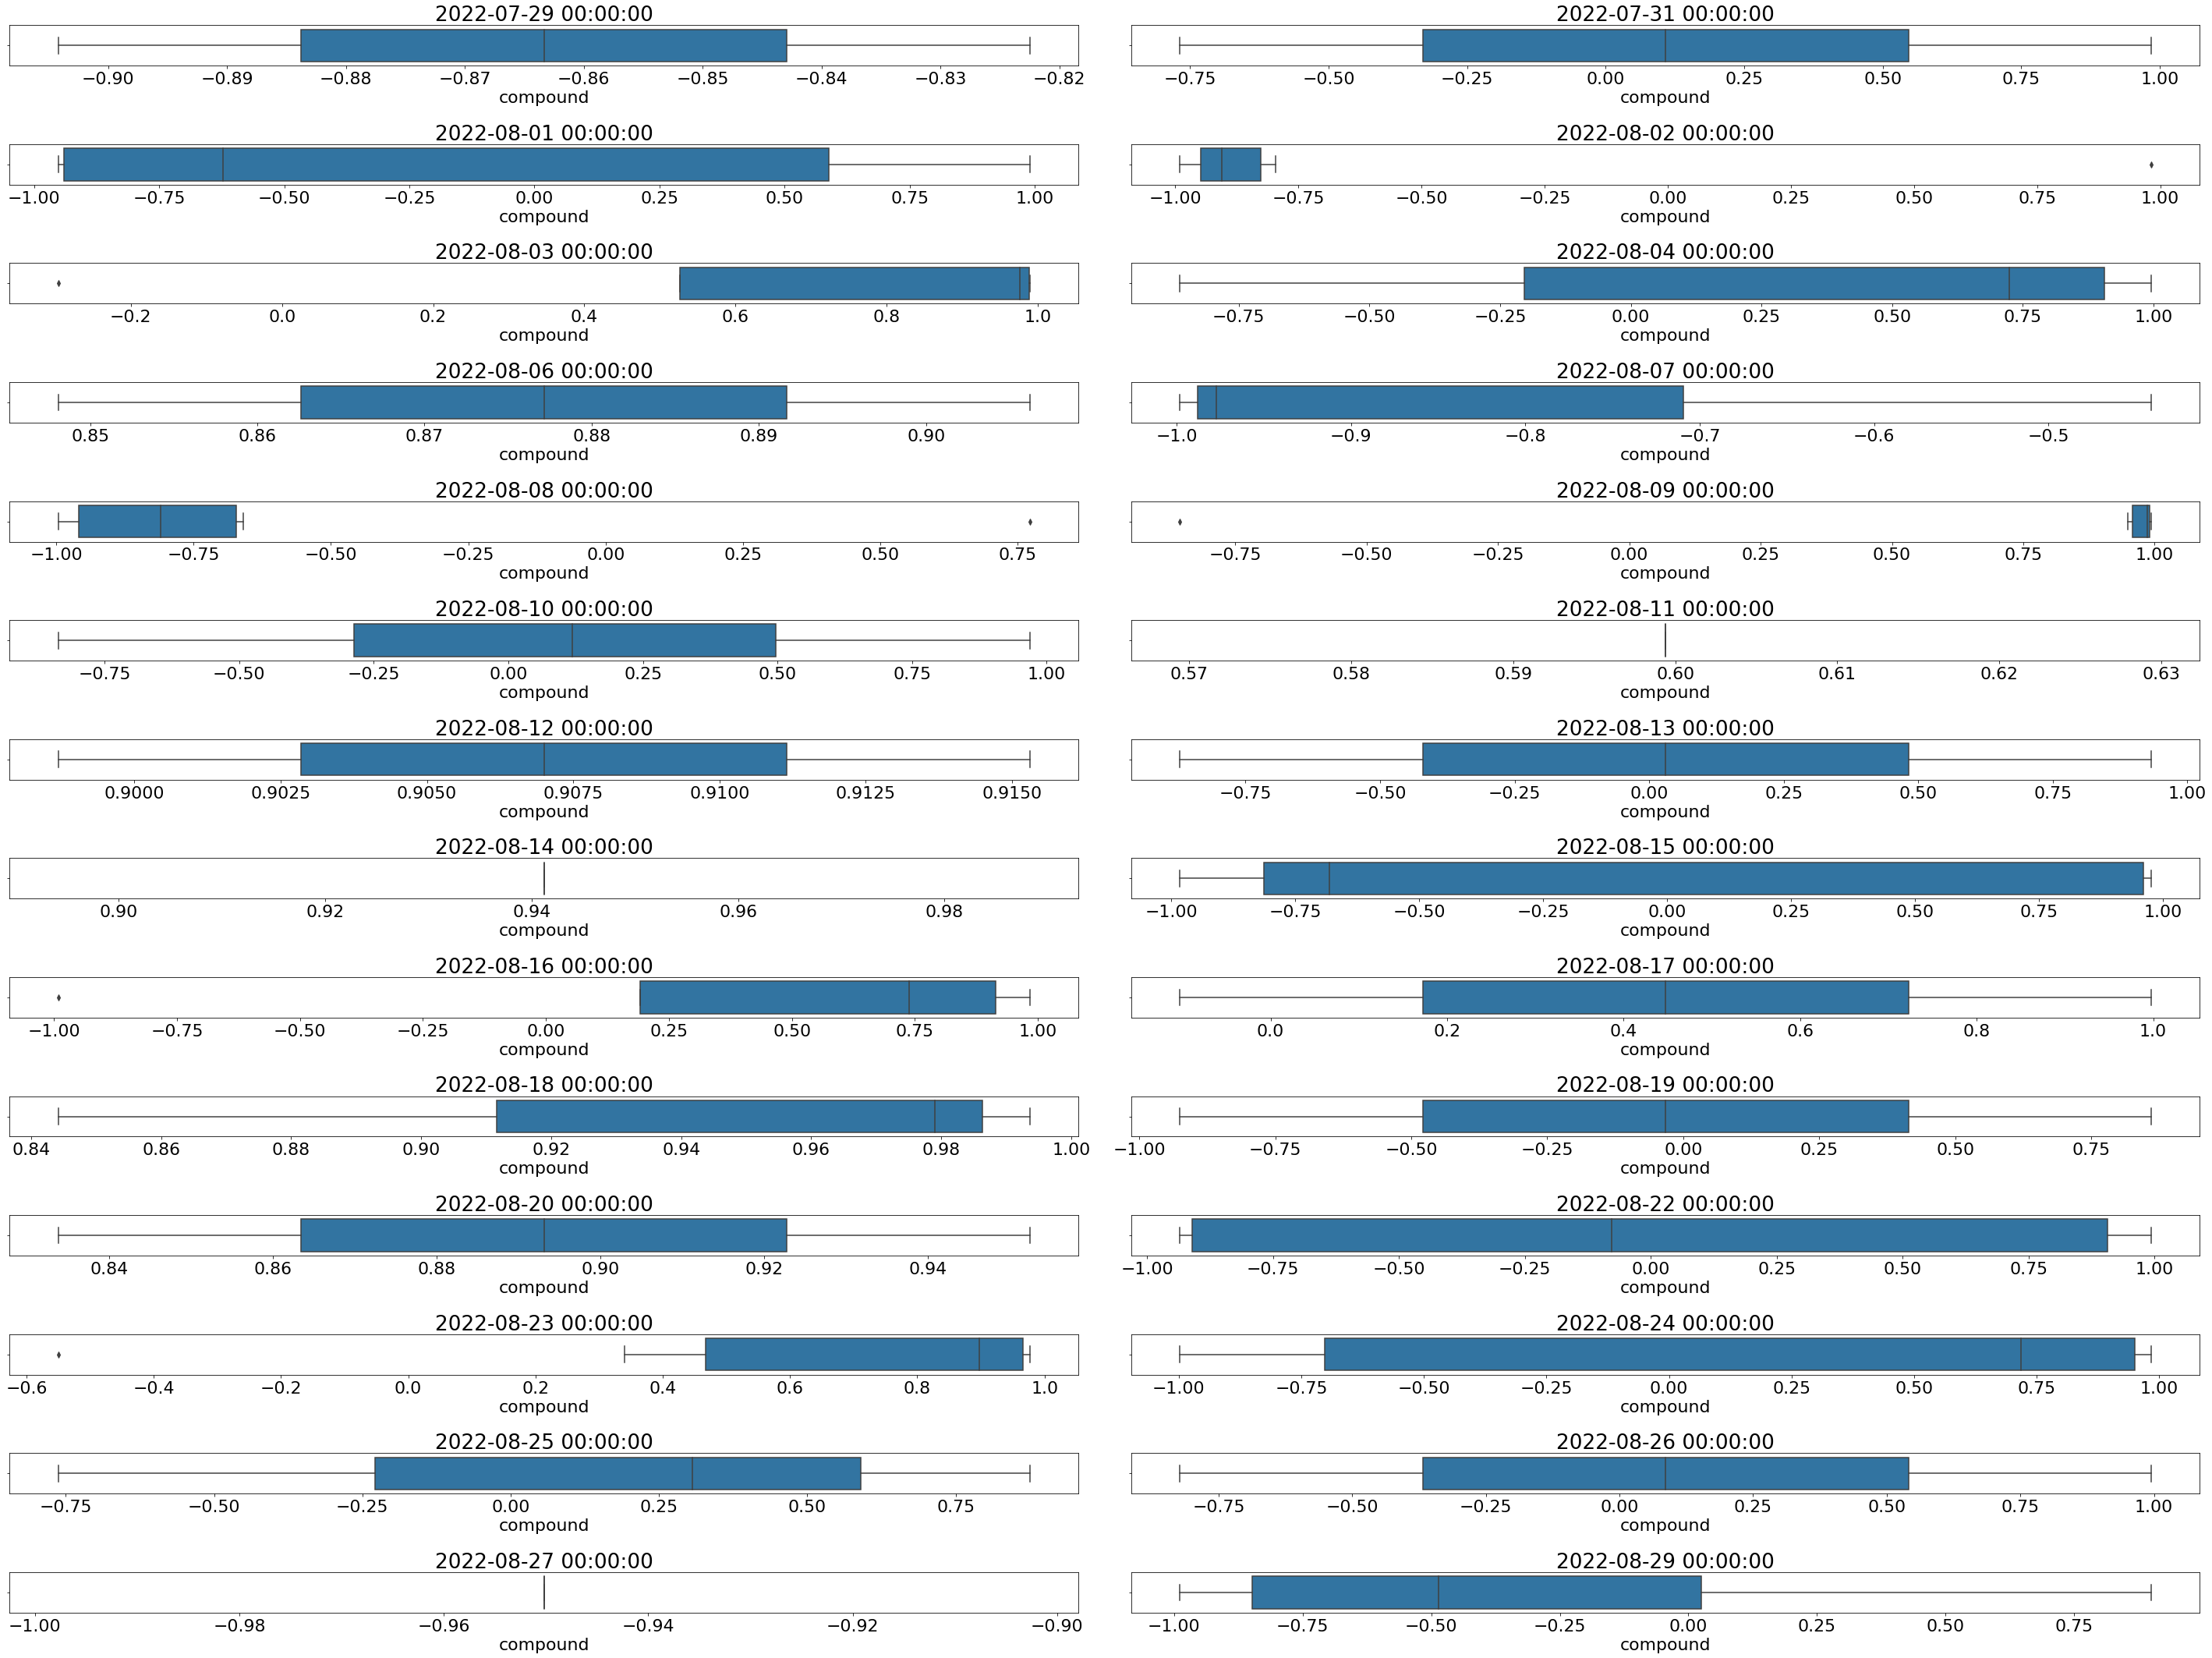

In [13]:
# check for outliers in compound score and remove
import matplotlib.pyplot as plt
import seaborn as sns
max_score = []
min_score = []

font = {'size'   : 22}
plt.rc('font', **font)
unique_dates = news['Date'].unique()
grouped_dates = news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

fig, axs = plt.subplots(14,2,figsize=(40.0, 30.0)) 
i=0
j=0
for key in grouped_dates.groups.keys():
    data_group = grouped_dates.get_group(key)
    sns.boxplot(x=data_group['compound'], ax=axs[i, j]).set_title(key)
    j+=1
    if j>=2:
      j=0
      i+=1

    Q1 = data_group['compound'].quantile(0.25)
    Q3 = data_group['compound'].quantile(0.75)
    IQR = Q3 - Q1   

    filter = (data_group['compound'] >= Q1 - 1.5 * IQR) & (data_group['compound'] <= Q3 + 1.5 *IQR)
    data_group=data_group.loc[filter] 
    
    if data_group["compound"].max() > 0:
        max_score.append(data_group["compound"].max())
    elif data_group["compound"].max() < 0:
        max_score.append(0)
    
    if data_group["compound"].min() < 0:
        min_score.append(data_group["compound"].min())
    elif data_group["compound"].min() > 0:
        min_score.append(0) 

plt.tight_layout()
plt.show()
extreme_score = pd.DataFrame({'Date':keys_dates, 'Min_Score':min_score, 'Max_Score':max_score})
extreme_score['Final_Score'] = extreme_score[['Min_Score','Max_Score']].sum(axis = 1)

Calculate final score for each day

In [14]:
extreme_score

,Date,Min_Score,Max_Score,Final_Score
0,2022-07-29,-0.9042,0.0000,-0.9042
1,2022-07-31,-0.7684,0.9844,0.2160
2,2022-08-01,-0.9517,0.9901,0.0384
3,2022-08-02,-0.9906,0.0000,-0.9906
4,2022-08-03,0.0000,0.9894,0.9894
5,2022-08-04,-0.8625,0.9956,0.1331
6,2022-08-06,0.0000,0.9062,0.9062
7,2022-08-07,-0.9981,0.0000,-0.9981
8,2022-08-08,-0.9960,0.0000,-0.9960
9,2022-08-09,0.0000,0.9936,0.9936


In [16]:
price = pd.read_csv('2022.csv')
price.drop(price.tail(3).index,inplace=True)

In [17]:
price.drop(price.head(137).index,inplace=True)

In [18]:
price["Date"] = pd.to_datetime(price["Date"])
price=price.set_index('Date')
extreme_score=extreme_score.set_index('Date')

In [19]:
# combine sentiment analysis score and mpob price
df = pd.concat([extreme_score, price], axis=1)
df=df.fillna(method='ffill')

In [20]:
df

,Min_Score,Max_Score,Final_Score,Price
Date,,,,
2022-07-29,-0.9042,0.0000,-0.9042,4197.0
2022-07-31,-0.7684,0.9844,0.2160,4197.0
2022-08-01,-0.9517,0.9901,0.0384,4143.5
2022-08-02,-0.9906,0.0000,-0.9906,3946.5
2022-08-03,0.0000,0.9894,0.9894,4011.5
2022-08-04,-0.8625,0.9956,0.1331,3939.0
2022-08-05,-0.8625,0.9956,0.1331,4040.5
2022-08-06,0.0000,0.9062,0.9062,4040.5
2022-08-07,-0.9981,0.0000,-0.9981,4040.5


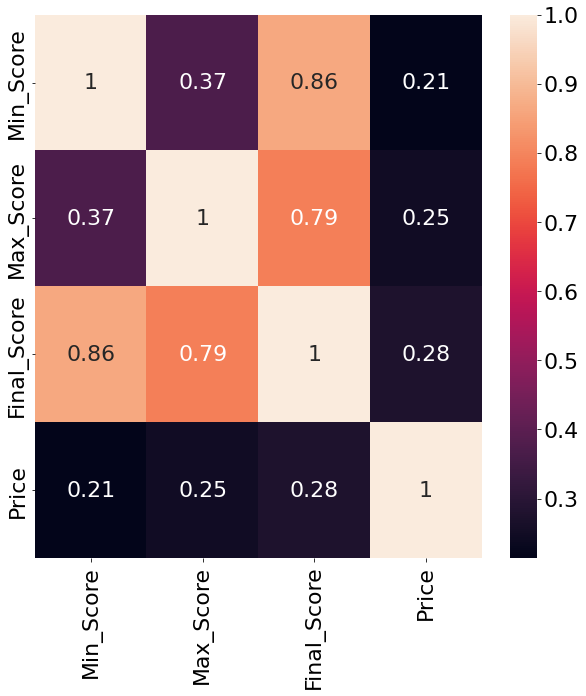

In [21]:
# correlation map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True)

Graph- MPOB Price & Compound Score

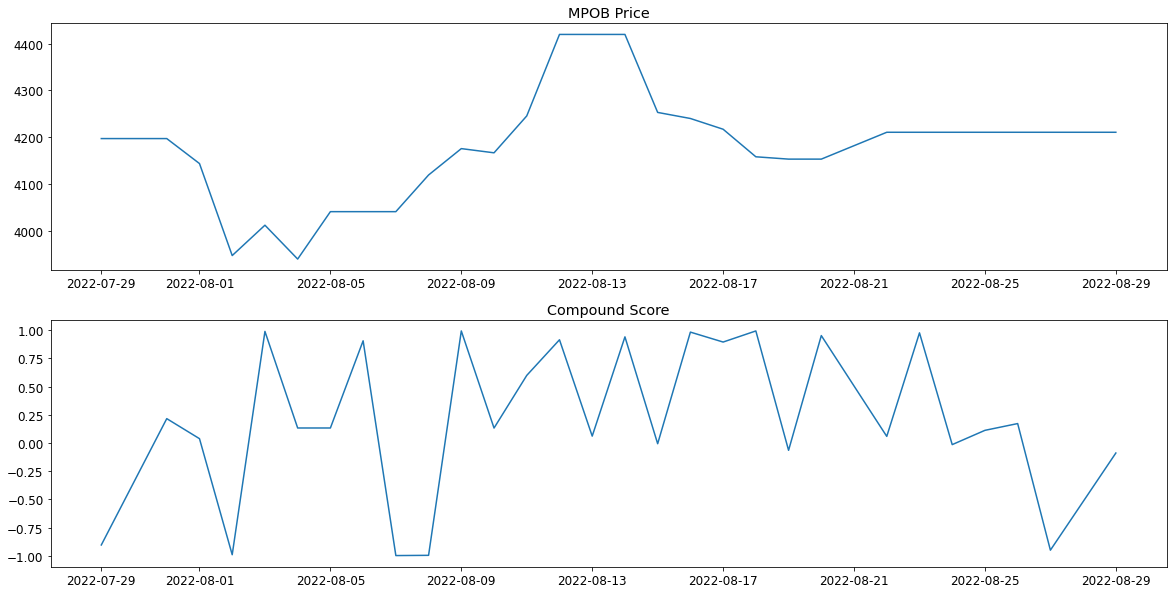

In [22]:
font = {'size'   : 12}
plt.rc('font', **font)
fig, axs = plt.subplots(2,1,figsize=(20, 10))
axs[0].plot(df.index, df['Price'])
axs[1].plot(df.index, df['Final_Score'])
axs[0].title.set_text('MPOB Price')
axs[1].title.set_text('Compound Score')

In [23]:
Increase = []
Decrease = []

for i in range(len(df)):
    if df['Final_Score'].values[i] > 0: # Price Increase Threshold
        Increase.append(df.index[i])
    elif df['Final_Score'].values[i] < 0: # Price Decrease Threshold
        Decrease.append(df.index[i])

vader_incr = []
for i in range(len(df)):
    if df.index[i] in Increase:
        vader_incr.append(i)
        
vader_dcr = []
for i in range(len(df)):
    if df.index[i].date() in Decrease:
        vader_dcr.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


Graph: Predicted price increase or decrease via compound score and actual MPOB Price

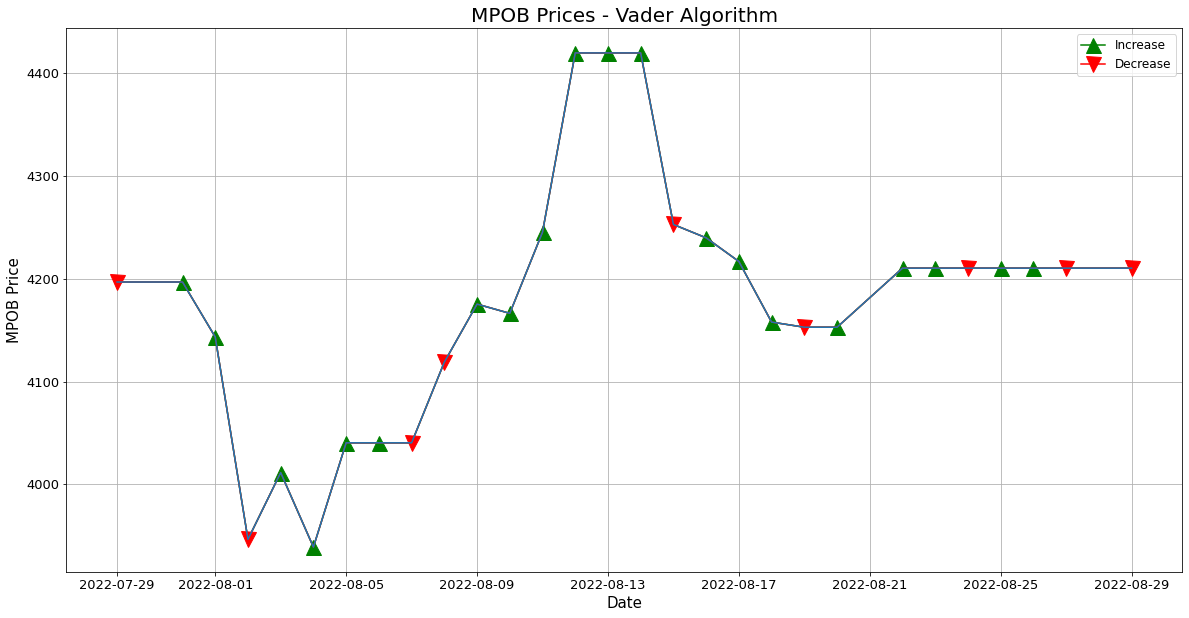

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df.index, df['Price'],'-^', markevery=vader_incr, ms=15, color = 'g')
ax.plot(df.index, df['Price'],'-v', markevery=vader_dcr, ms=15, color = 'r')
ax.plot(df.index, df['Price'])
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('MPOB Price', fontsize = 15)
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)
ax.set_title('MPOB Prices - Vader Algorithm', fontdict = {'size': 20})
ax.legend(['Increase','Decrease'])
ax.grid()
plt.show()